In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
pd.set_option("display.max_columns", 200)
from sklearn.preprocessing import StandardScaler

def custom_round(x, base=100):
    return int(base * round(float(x)/base))

from catboost import CatBoostRegressor
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [357]:
#Load in Test and Train data sets from kaggle https://www.kaggle.com/competitions/allstate-claims-severity/rules
train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv') 
traindf = train

In [28]:
#Quick scan of the columns contents reveal most categorical character variablesand some base64 that are almost binary in nature
#Running everything through a preprocessing pipeline would limit a lot of the noise here but catboost will handle it the same
train.head(1)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.7263,0.245921,0.187583,0.789639,0.310061,0.718367,0.33506,0.3026,0.67135,0.8351,0.569745,0.594646,0.822493,0.714843,2213.18


In [87]:
#training set
train = train.iloc[:,1:]
train.head(2)

,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [14]:
#training data size
train.shape

(188318, 130)

In [108]:
#Checking for NULL values
train.isnull().values.any()

False

In [16]:
#Target varible has a lot of trailing decimal places so look at the dsitribution rounded to the 1000th place
traindf['loss'] = traindf['loss'] = train.loss.apply(lambda x: custom_round(x, base=1000))

(0.0, 20000.0)

<Figure size 720x432 with 0 Axes>

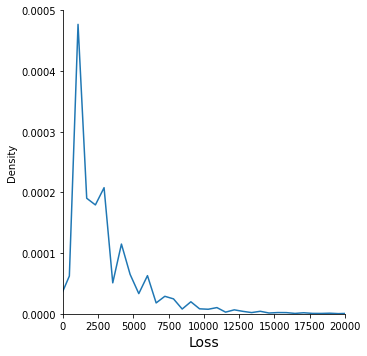

In [17]:
#Looks like 95% of data us indr 10000
plt.figure(figsize=(10,6))
sns.set_context(font_scale= 10)
sns.displot(traindf["loss"], kind = 'kde')
plt.xlabel("Loss", fontsize=14)
plt.xlim(0, 20000)

(0.0, 1e-08)

<Figure size 720x432 with 0 Axes>

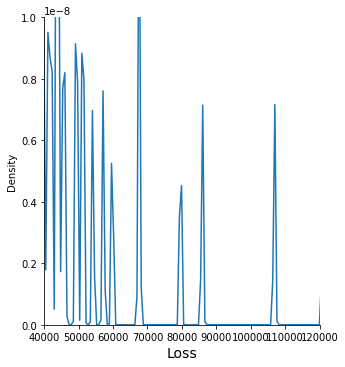

In [19]:
#Most of the loss at the tail end is noise
plt.figure(figsize=(10,6))
sns.set_context(font_scale= 10)
sns.displot(traindf["loss"], kind = 'kde')
plt.xlabel("Loss", fontsize=14)
plt.xlim(40000, 120000)
plt.ylim(0,0.00000001)

In [21]:
#visualizing numerical variables relation to the target variable
traindf = train.iloc[:,-15:]  
traindf['loss']= traindf['loss'].apply(lambda x: custom_round(x, base=1000))

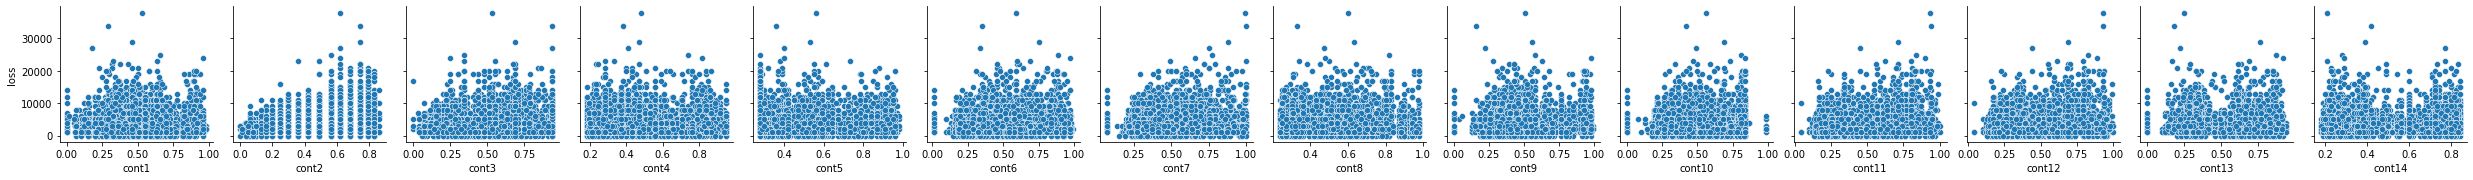

In [22]:
sns.pairplot(traindf.sample(10000, replace=False, random_state=1),y_vars = ['loss'],x_vars = traindf.iloc[:,-15:-1] )

In [165]:
#grabbing training set
X = train.iloc[:,1:-1]
Y = train.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [163]:
#listing features as numerical or categorical for CatBoost
cat_features = list(X.iloc[:,:116].columns)
num_features = list(X.iloc[:,116:].columns)
features = list(X.columns)

In [250]:
#feeding some out of the box params 
params = {'iterations':25,
          'learning_rate':.001,
        'loss_function':'RMSE',
        'eval_metric':'MAE',
        'random_seed':55,
        'od_type':"Iter",
        'od_wait':20,
        'use_best_model':True}

Loss_Model = CatBoostRegressor(**params)

y_pred = Loss_Model.fit(X_train, y_train, cat_features = cat_features,eval_set=(X_test, y_test), plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0008097	test: 0.0008026	best: 0.0008026 (0)	total: 190ms	remaining: 4.55s
1:	learn: 0.0016171	test: 0.0016100	best: 0.0016100 (1)	total: 374ms	remaining: 4.3s
2:	learn: 0.0024299	test: 0.0024223	best: 0.0024223 (2)	total: 533ms	remaining: 3.91s
3:	learn: 0.0032436	test: 0.0032322	best: 0.0032322 (3)	total: 683ms	remaining: 3.58s
4:	learn: 0.0040565	test: 0.0040434	best: 0.0040434 (4)	total: 840ms	remaining: 3.36s
5:	learn: 0.0048720	test: 0.0048565	best: 0.0048565 (5)	total: 986ms	remaining: 3.12s
6:	learn: 0.0056813	test: 0.0056750	best: 0.0056750 (6)	total: 1.14s	remaining: 2.93s
7:	learn: 0.0064897	test: 0.0064838	best: 0.0064838 (7)	total: 1.3s	remaining: 2.75s
8:	learn: 0.0072936	test: 0.0072890	best: 0.0072890 (8)	total: 1.48s	remaining: 2.63s
9:	learn: 0.0080989	test: 0.0080933	best: 0.0080933 (9)	total: 1.7s	remaining: 2.56s
10:	learn: 0.0088988	test: 0.0089045	best: 0.0089045 (10)	total: 1.88s	remaining: 2.39s
11:	learn: 0.0097006	test: 0.0097047	best: 0.0097047 (1

In [183]:
#lets look at how much data we lose when we drop outliers
sum(train['loss']>20000)/len(train['loss'])*100

0.23258530783037204

### .23% loss so we'll drop everything higher than 20000

In [251]:
#Checking to see how many rows we lost: 188318 - 187880 so not much
train=train.drop(train[train['loss']>20000].index)
train.shape

(187880, 132)

Text(0.5, 6.79999999999999, 'Loss')

<Figure size 720x432 with 0 Axes>

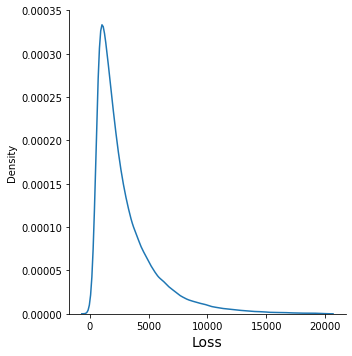

In [252]:
#Loss looks a lot more stable
plt.figure(figsize=(10,6))
sns.set_context(font_scale= 10)
sns.displot(train["loss"], kind = 'kde')
plt.xlabel("Loss", fontsize=14)

In [358]:
#Running again and turning categorical variables into numerical. In hindsight this was not needed for CatBoost
X = train1.iloc[:,1:-1]
Y = train1.iloc[:,-1:]

Cats=list(X.select_dtypes(np.object))

for i in Cats:
    X[i] = X[i].astype('category').cat.codes



In [265]:
#New table
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)     
X_train                 

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
119965,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,1,2,1,1,1,0,0,0,0,0,3,3,3,4,2,0,12,9,0,0,0,4,4,6,5,1,33,106,0,36,48,2,10,79,0.513457,0.681761,0.549770,0.594598,0.811271,0.416181,0.402349,0.62918,0.50630,0.37493,0.338312,0.331643,0.315758,0.362336
87147,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,1,1,2,3,1,1,2,1,1,1,0,0,0,0,0,3,3,3,4,2,0,12,13,0,0,0,4,4,7,5,1,33,102,7,36,4,4,10,79,0.480125,0.358319,0.484196,0.373816,0.422268,0.317735,0.362399,0.26847,0.41471,0.43919,0.307628,0.301921,0.315758,0.361258
17487,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,1,2,1,3,1,0,0,0,0,0,3,2,2,3,0,3,15,1,3,0,0,10,5,5,10,10,33,60,0,35,49,0,15,279,0.655966,0.555782,0.336963,0.761209,0.281143,0.858100,0.681493,0.82252,0.58325,0.80569,0.843548,0.832658,0.866072,0.384641
162458,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,1,2,1,1,1,0,0,0,0,0,3,3,3,4,2,0,12,0,0,0,0,5,6,8,5,1,33,127,0,46,38,4,10,161,0.475784,0.299102,0.549770,0.383428,0.789070,0.326207,0.368970,0.36083,0.39849,0.39599,0.422624,0.481306,0.339244,0.296650
41859,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,3,1,3,0,1,2,3,3,1,0,0,0,1,5,2,1,2,4,2,3,15,5,2,0,3,7,4,7,11,10,33,9,0,32,9,0,15,135,0.368727,0.299102,0.162313,0.259793,0.348388,0.580786,0.567596,0.34987,0.37458,0.50000,0.415029,0.424625,0.728429,0.210190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,1,2,1,1,1,0,0,0,1,5,3,3,4,4,4,0,14,5,0,0,0,3,4,9,8,8,2,65,2,19,54,0,12,62,0.270907,0.620805,0.728827,0.722125,0.413817,0.295979,0.326973,0.56011,0.33237,0.30060,0.301022,0.295524,0.417430,0.724506
103927,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,1,1,2,1,1,1,0,0,0,1,5,3,1,1,4,2,0,9,5,3,0,1,6,5,5,4,1,33,44,0,46,22,0,9,179,0.546670,0.245921,0.317666,0.345595,0.380560,0.423055,0.499092,0.37194,0.39849,0.37493,0.472726,0.462286,0.231475,0.294334
132240,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [279]:
#New out of the box params with better data
params = {'iterations':20,
        'loss_function':'MAE',
        'eval_metric':'MAE',
        'random_seed':55,
        'od_type':"Iter",
        'od_wait':20,
        'max_depth':7,
        'learning_rate':0.3,
        'use_best_model':True,
         'max_ctr_complexity':2,
        'verbose':True}

Loss_Model = CatBoostRegressor(**params)

y_pred = Loss_Model.fit(X_train, y_train, cat_features = cat_features,eval_set=(X_test, y_test), plot= True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1574.0651129	test: 1567.9020856	best: 1567.9020856 (0)	total: 587ms	remaining: 11.2s
1:	learn: 1449.0675054	test: 1444.7954502	best: 1444.7954502 (1)	total: 1.25s	remaining: 11.3s
2:	learn: 1373.6292556	test: 1370.1452717	best: 1370.1452717 (2)	total: 1.88s	remaining: 10.7s
3:	learn: 1325.3242705	test: 1322.1985754	best: 1322.1985754 (3)	total: 2.46s	remaining: 9.84s
4:	learn: 1283.2459448	test: 1279.9906665	best: 1279.9906665 (4)	total: 3.12s	remaining: 9.35s
5:	learn: 1251.0371497	test: 1249.0586260	best: 1249.0586260 (5)	total: 3.78s	remaining: 8.83s
6:	learn: 1230.2904829	test: 1229.1695914	best: 1229.1695914 (6)	total: 4.37s	remaining: 8.12s
7:	learn: 1215.2028115	test: 1215.4324803	best: 1215.4324803 (7)	total: 4.97s	remaining: 7.46s
8:	learn: 1202.8107726	test: 1203.7549783	best: 1203.7549783 (8)	total: 5.67s	remaining: 6.92s
9:	learn: 1194.5269730	test: 1196.1405991	best: 1196.1405991 (9)	total: 6.46s	remaining: 6.46s
10:	learn: 1187.8831226	test: 1190.3325506	best: 1

In [271]:
#Most important variables
feat_import = [t for t in zip(features, Loss_Model.get_feature_importance())]
feat_import_df = pd.DataFrame(feat_import, columns=['Feature', 'VarImp'])
feat_import_df = feat_import_df.sort_values('VarImp', ascending=False)
feat_import_df.head(20)

,Feature,VarImp
79,cat79,17.148395
78,cat78,9.682395
56,cat56,8.805401
11,cat11,8.501079
100,cat100,6.789188
117,cont1,5.847826
99,cat99,4.971760
80,cat80,3.900457
52,cat52,2.799134
122,cont6,2.792496


In [283]:
#What if we ran it through a pre prcoesing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

X = prediction_input_preprocessor=preprocessor.fit(X_train) 

In [296]:
#Running model with piped data
params = {'iterations':200,
        'loss_function':'MAE',
        'eval_metric':'MAE',
        'random_seed':55,
        'od_type':"Iter",
        'od_wait':20,
        'max_depth':4,
        'learning_rate':0.3,
        'use_best_model':True,
        'max_ctr_complexity':3,
        'l2_leaf_reg':7,
        'verbose':True}

Loss_Model = CatBoostRegressor(**params)

y_pred = Loss_Model.fit(preprocessor.transform(X_train) , y_train, eval_set=(preprocessor.transform(X_test) , y_test), plot= True)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1592.3802505	test: 1585.8158693	best: 1585.8158693 (0)	total: 29ms	remaining: 5.76s
1:	learn: 1500.1727312	test: 1493.5342491	best: 1493.5342491 (1)	total: 62ms	remaining: 6.13s
2:	learn: 1434.6345535	test: 1428.5175166	best: 1428.5175166 (2)	total: 83.6ms	remaining: 5.49s
3:	learn: 1392.6116233	test: 1386.9546277	best: 1386.9546277 (3)	total: 118ms	remaining: 5.79s
4:	learn: 1362.5359612	test: 1356.6311951	best: 1356.6311951 (4)	total: 140ms	remaining: 5.46s
5:	learn: 1331.2347025	test: 1325.5299146	best: 1325.5299146 (5)	total: 161ms	remaining: 5.21s
6:	learn: 1314.8745579	test: 1309.4797763	best: 1309.4797763 (6)	total: 184ms	remaining: 5.07s
7:	learn: 1296.9697041	test: 1291.7282210	best: 1291.7282210 (7)	total: 206ms	remaining: 4.95s
8:	learn: 1284.3246259	test: 1279.9533615	best: 1279.9533615 (8)	total: 235ms	remaining: 4.99s
9:	learn: 1273.0917931	test: 1268.6428672	best: 1268.6428672 (9)	total: 279ms	remaining: 5.3s
10:	learn: 1264.3833489	test: 1260.3952494	best: 126

89:	learn: 1139.3646335	test: 1147.6715656	best: 1147.6715656 (89)	total: 2.22s	remaining: 2.72s
90:	learn: 1139.1680503	test: 1147.5218157	best: 1147.5218157 (90)	total: 2.25s	remaining: 2.69s
91:	learn: 1139.0058528	test: 1147.3627089	best: 1147.3627089 (91)	total: 2.29s	remaining: 2.69s
92:	learn: 1138.8392320	test: 1147.2179199	best: 1147.2179199 (92)	total: 2.31s	remaining: 2.66s
93:	learn: 1138.2779776	test: 1146.9857878	best: 1146.9857878 (93)	total: 2.33s	remaining: 2.63s
94:	learn: 1137.8334607	test: 1146.7488432	best: 1146.7488432 (94)	total: 2.35s	remaining: 2.6s
95:	learn: 1137.5984396	test: 1146.5739359	best: 1146.5739359 (95)	total: 2.37s	remaining: 2.57s
96:	learn: 1137.2808497	test: 1146.3347482	best: 1146.3347482 (96)	total: 2.39s	remaining: 2.54s
97:	learn: 1136.6771792	test: 1146.0015070	best: 1146.0015070 (97)	total: 2.41s	remaining: 2.51s
98:	learn: 1135.9127611	test: 1145.4803386	best: 1145.4803386 (98)	total: 2.44s	remaining: 2.48s
99:	learn: 1135.6227596	test: 1

178:	learn: 1117.5388350	test: 1134.6426662	best: 1134.6426662 (178)	total: 4.88s	remaining: 573ms
179:	learn: 1117.4335935	test: 1134.5765518	best: 1134.5765518 (179)	total: 4.91s	remaining: 546ms
180:	learn: 1117.3216960	test: 1134.5194312	best: 1134.5194312 (180)	total: 4.94s	remaining: 519ms
181:	learn: 1117.1600396	test: 1134.4663107	best: 1134.4663107 (181)	total: 4.98s	remaining: 493ms
182:	learn: 1117.0775562	test: 1134.4776222	best: 1134.4663107 (181)	total: 5.01s	remaining: 466ms
183:	learn: 1116.9813215	test: 1134.4778821	best: 1134.4663107 (181)	total: 5.05s	remaining: 439ms
184:	learn: 1116.8477783	test: 1134.4531262	best: 1134.4531262 (184)	total: 5.08s	remaining: 412ms
185:	learn: 1116.5888798	test: 1134.2694756	best: 1134.2694756 (185)	total: 5.11s	remaining: 385ms
186:	learn: 1116.3802065	test: 1134.0969522	best: 1134.0969522 (186)	total: 5.15s	remaining: 358ms
187:	learn: 1116.2211654	test: 1133.9681694	best: 1133.9681694 (187)	total: 5.2s	remaining: 332ms
188:	learn:

In [ ]:
#Hyper tuning Params
grid = {'learning_rate': [0.03, 0.1,0.3,0.2],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'max_ctr_complexity':[1, 2, 3],
       }    
grid_search_result = CatBoostRegressor(iterations=200,loss_function='MAE').grid_search(param_grid = grid, X=preprocessor.transform(X_train),
                                                     y=y_train,train_size=0.5, cv=3,plot=True)

In [359]:
#hyper tuned params, new params, and no piped data
params = {'iterations':300,
        'loss_function':'MAE',
        'eval_metric':'MAE',
        'random_seed':55,
        'od_type':"Iter",
        'od_wait':20,
        'depth':10,
        'learning_rate':0.1,
        'use_best_model':True,
        'max_ctr_complexity':1,
        'l2_leaf_reg':7,
        'bagging_temperature':0.3,
        'bootstrap_type':'Bayesian',
        'verbose':True}
Loss_Model = CatBoostRegressor(**params)

y_pred = Loss_Model.fit(X_train , y_train, eval_set=(X_test , y_test), plot= True)            

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1688.5946827	test: 1681.5148543	best: 1681.5148543 (0)	total: 125ms	remaining: 37.4s
1:	learn: 1624.9865384	test: 1619.3578177	best: 1619.3578177 (1)	total: 238ms	remaining: 35.4s
2:	learn: 1568.6609295	test: 1564.5833636	best: 1564.5833636 (2)	total: 361ms	remaining: 35.8s
3:	learn: 1518.9465041	test: 1516.3254563	best: 1516.3254563 (3)	total: 491ms	remaining: 36.3s
4:	learn: 1479.5765494	test: 1478.2195876	best: 1478.2195876 (4)	total: 636ms	remaining: 37.5s
5:	learn: 1444.3329750	test: 1444.3274547	best: 1444.3274547 (5)	total: 770ms	remaining: 37.7s
6:	learn: 1415.2247063	test: 1416.1040945	best: 1416.1040945 (6)	total: 909ms	remaining: 38.1s
7:	learn: 1390.7152757	test: 1392.4561419	best: 1392.4561419 (7)	total: 1.07s	remaining: 39s
8:	learn: 1365.1143977	test: 1367.5743915	best: 1367.5743915 (8)	total: 1.23s	remaining: 39.7s
9:	learn: 1342.9640084	test: 1346.0916048	best: 1346.0916048 (9)	total: 1.37s	remaining: 39.8s
10:	learn: 1322.2679669	test: 1326.1530405	best: 132

85:	learn: 1089.7588339	test: 1141.3288182	best: 1141.3288182 (85)	total: 18.2s	remaining: 45.2s
86:	learn: 1089.2890977	test: 1141.0663511	best: 1141.0663511 (86)	total: 18.4s	remaining: 45s
87:	learn: 1088.4618468	test: 1140.6678072	best: 1140.6678072 (87)	total: 18.7s	remaining: 45.1s
88:	learn: 1088.1469199	test: 1140.4804554	best: 1140.4804554 (88)	total: 19s	remaining: 44.9s
89:	learn: 1087.4372223	test: 1140.2487245	best: 1140.2487245 (89)	total: 19.2s	remaining: 44.8s
90:	learn: 1086.4271157	test: 1139.9386654	best: 1139.9386654 (90)	total: 19.4s	remaining: 44.6s
91:	learn: 1085.5716335	test: 1139.6692651	best: 1139.6692651 (91)	total: 19.6s	remaining: 44.3s
92:	learn: 1084.8599612	test: 1139.4140972	best: 1139.4140972 (92)	total: 19.8s	remaining: 44s
93:	learn: 1084.4133101	test: 1139.3048768	best: 1139.3048768 (93)	total: 20s	remaining: 43.8s
94:	learn: 1084.0600220	test: 1139.1937293	best: 1139.1937293 (94)	total: 20.2s	remaining: 43.6s
95:	learn: 1083.6155481	test: 1139.066

169:	learn: 1034.9323400	test: 1126.8054541	best: 1126.8054541 (169)	total: 32.5s	remaining: 24.9s
170:	learn: 1034.1708138	test: 1126.6693429	best: 1126.6693429 (170)	total: 32.7s	remaining: 24.7s
171:	learn: 1033.7132658	test: 1126.5642585	best: 1126.5642585 (171)	total: 32.8s	remaining: 24.4s
172:	learn: 1033.2428479	test: 1126.4649138	best: 1126.4649138 (172)	total: 33s	remaining: 24.2s
173:	learn: 1032.6208491	test: 1126.4335858	best: 1126.4335858 (173)	total: 33.2s	remaining: 24s
174:	learn: 1032.0666257	test: 1126.4219196	best: 1126.4219196 (174)	total: 33.3s	remaining: 23.8s
175:	learn: 1031.7016144	test: 1126.2835557	best: 1126.2835557 (175)	total: 33.5s	remaining: 23.6s
176:	learn: 1031.2237152	test: 1126.1633951	best: 1126.1633951 (176)	total: 33.7s	remaining: 23.4s
177:	learn: 1030.5579357	test: 1125.9748915	best: 1125.9748915 (177)	total: 33.9s	remaining: 23.2s
178:	learn: 1029.8457514	test: 1125.8893613	best: 1125.8893613 (178)	total: 34s	remaining: 23s
179:	learn: 1029.2

253:	learn: 993.8591146	test: 1122.4186701	best: 1122.4186701 (253)	total: 44.4s	remaining: 8.04s
254:	learn: 993.1073905	test: 1122.3767482	best: 1122.3767482 (254)	total: 44.6s	remaining: 7.86s
255:	learn: 992.6630381	test: 1122.3671467	best: 1122.3671467 (255)	total: 44.7s	remaining: 7.68s
256:	learn: 992.3466616	test: 1122.3371575	best: 1122.3371575 (256)	total: 44.9s	remaining: 7.51s
257:	learn: 991.9321497	test: 1122.2290981	best: 1122.2290981 (257)	total: 45.1s	remaining: 7.34s
258:	learn: 991.7872728	test: 1122.2277650	best: 1122.2277650 (258)	total: 45.2s	remaining: 7.16s
259:	learn: 991.2083885	test: 1122.1514698	best: 1122.1514698 (259)	total: 45.4s	remaining: 6.99s
260:	learn: 990.7913763	test: 1122.1483495	best: 1122.1483495 (260)	total: 45.6s	remaining: 6.81s
261:	learn: 990.3097703	test: 1122.0493864	best: 1122.0493864 (261)	total: 45.8s	remaining: 6.64s
262:	learn: 989.8799012	test: 1122.0954323	best: 1122.0493864 (261)	total: 46s	remaining: 6.47s
263:	learn: 989.517774

### 1121 loss almost on leaderboard!